# KNU 감성사전을 통한 단어의 긍정/부정을 판단하기

In [3]:
# ### KNU 한국어 감성사전 -DI LAB
# - SentiWord info.json 한국어 감성사전 제공

import json
import pandas as pd
from tqdm import tqdm

In [4]:
SentiWord = pd.read_json('SentiWord_info.json') # json 파일 불러옴
SentiWord.to_csv('SentiWord_info.csv', index=False) # json 파일을 csv로 저장

In [5]:
import sqlite3

In [6]:
conn = sqlite3.connect("practice.db") # practice.db 연결
c = conn.cursor() # db를 사용하기 위한 cursor

In [8]:
c.execute("SELECT text FROM newspapers") # newspaper table의 내용을 추출

articles = [] # list 선언

for row in c.fetchall():  # table의 내용을 반복하여 추출
  articles.append(row)  # 해당 내용을 articles list에 넣음

print(articles[0])  # articles[i]가 title, text 등 모든 내용을 포함한 기사 1개

('로또복권 운영사 동행복권은 제974회 로또복권 추첨에서 ‘1, 2, 11, 16, 39, 44’이 1등 당첨번호로 뽑혔다고 31일 밝혔다. 2등 보너스 번호는 ‘32’다.당첨번호 6개를 모두 맞힌 1등 당첨자는 17명으로 13억1703만4523원씩 받는다. 당첨번호 5개와 보너스 번호가 일치한 2등은 66명으로 각 5653만9361원씩을, 당첨번호 5개를 맞힌 3등은 2636명으로 141만5629원씩을 받는다.당첨번호 4개를 맞힌 4등(고정 당첨금 5만원)은 12만9473명, 당첨번호 3개가 일치한 5등(고정 당첨금 5000원)은 214만9319명이다.이재덕 기자 duk@kyunghyang.com',)


In [37]:
df = pd.read_excel('./sample.xls', names=['title', 'press', 'category', 'date', 'name', 'text']) # sample.xls 헤더 이름을 붙여 가져오기
txt = ''
for i in df.index:
    txt = txt +' ' +str(df['text'].loc[i]) # 기사 제목을 연달아 출력 ex) '기사1 제목' + '기사2 제목' + '기사3 제목' -> 고쳐야 되는 부분(기사 내용이 들어가고 기사 하나씩 들어가게 변경해야함)
    
print(txt)

 중국에서 6000km 떨어진 발트해 연안 국가 리투아니아가 ‘대만 문제’를 두고 중국과 갈등을 빚고 있다. 리투아니아가 대만대표부를 허용했다는 이유로 중국 정부가 대사 소환을 요구한 데 이어 양국 단교 가능성도 거론된다.중국 관영매체 환구시보는 11일 전문가를 인용해 “리투아니아가 중국에 도전하는 행동을 계속 한다면 양국이 단교하는 국면으로 가는 것도 배제할 수 없다”고 보도했다. 전날 중국 외교부는 대면인 명의로 “리투아니아가 대만의 대표처 설립을 허용해 중국의 주권과 영토 보전을 심각하게 침해했다”며 자국 대사를 소환하겠다고 밝혔다. 리투아니아 정부에도 주중 대사를 불러들이라고 요구했다. 중국 외교부는 “우리는 리투아니아 정부가 즉각 잘못을 바로잡고 실질적인 조처를 하는 동시에, 잘못된 길을 더 멀리 가지 말 것을 당부한다”고도 밝혔다.중국이 해외 대사를 소환하는 것은 26년 만이다. 대사 소환은 단교 다음으로 심각한 조치로 여겨진다. 중국은 1995년 미국 정부가 리덩후이 전 대만 총통의 방미를 허용했을 때 당시 미국 주재 대사를 소환했다.리투아니아는 중국에 물러서지 않을 전망이다. 사우스차이나모닝포스트(SCMP)에 따르면 10일 열린 리투아니아 의회 임시 본회의에서 “지기만타스 파빌리오니스 집권 조국연합-기독민주당 의원은 “우리 리투아니아는 통상 상호적 조치를 취하는 만큼 우리도 주중 대사를 소환하게 될 것”이라고 말했다. 다만 야권 농민녹색연합 소속 지에드리우스 서플리스 의원은 “대만 문제를 좀 더 외교적으로 다룰 필요가 있다”고 말했다. 이날 회의는 당초 벨라루스 국경 페쇄 문제를 논의하기 위해 열렸으나 중국 측의 요구로 대사 소환 문제도 함께 다뤄졌다. 네드 프라이스 미 국무부 대변인은 이날 정례브리핑에서 중국의 리투아니아에 대한 보복을 규탄한다고 말했다.리투아니아가 대만 문제로 중국의 심기를 불편하게 한 것은 이번이 처음이 아니다. 리투아니아는 지난 5월 중국이 주도하는 동유럽 인프라 투자 논의 협의체인 ‘17+1 정상회의’를 탈퇴했다. 같은달

In [9]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   117k      0 --:--:-- --:--:-- --:--:--  117k


In [ ]:
!bash ./mecab.sh

In [ ]:
!python -m pip install konlpy

In [40]:
# from konlpy.tag import Okt
okt = Okt()
morp = okt.morphs(txt)
print(morp)

['중국', '에서', '6000', 'km', '떨어진', '발트해', '연안', '국가', '리투아니아', '가', '‘', '대만', '문제', '’', '를', '두고', '중국', '과', '갈등', '을', '빚', '고', '있다', '.', '리투아니아', '가', '대', '만', '대표', '부를', '허용', '했다는', '이유', '로', '중국', '정부', '가', '대사', '소환', '을', '요구', '한', '데', '이어', '양국', '단교', '가능성', '도', '거론', '된다', '.', '중국', '관영', '매체', '환', '구', '시보', '는', '11일', '전문가', '를', '인용', '해', '“', '리투아니아', '가', '중국', '에', '도전', '하는', '행동', '을', '계속', '한다면', '양국', '이', '단교', '하는', '국면', '으로', '가는', '것', '도', '배제', '할', '수', '없다', '”', '고', '보도', '했다', '.', '전날', '중국', '외교부', '는', '대면', '인', '명의', '로', '“', '리투아니아', '가', '대만', '의', '대표', '처', '설립', '을', '허용', '해', '중국', '의', '주권', '과', '영토', '보전', '을', '심각하게', '침해', '했다', '”', '며', '자국', '대사', '를', '소환', '하겠다고', '밝혔다', '.', '리투아니아', '정부', '에도', '주중', '대사', '를', '불러', '들이라고', '요구', '했다', '.', '중국', '외교부', '는', '“', '우리', '는', '리투아니아', '정부', '가', '즉각', '잘못', '을', '바로잡고', '실질', '적', '인', '조처', '를', '하는', '동시', '에', ',', '잘', '못', '된', '길', '을', '더', '멀리', '가지', '말', 

In [15]:
from konlpy.tag import Okt

In [16]:
from konlpy.tag import Mecab

In [17]:
mecab = Mecab() # mecab 사용

In [18]:
# 의미 없는 단어(조사 등) 제외
stopwords = ['은', '도', '는', '다', '의', '가', '이', '했', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '것', '에서', '이고', '라고', '다고', '라기', '라며', '면서', '라면서', '로써', '로서', '로', '으로', '뿐', '에서', '어야', '부터', '었', '았', '한다', '이다', '였다', '였었다', ',' , '.', '>', '<', ')', '(']

In [23]:
type(articles[0])

tuple

In [25]:
str.join(articles[0]) # 

TypeError: ignored

In [38]:
articles[0].str.replace('[^가-힣]','')  # 해당 글자 외 다 제외

AttributeError: ignored

In [19]:
def mec(i):
  words = list()
  for tok in articles[i]:
    encoded = mecab.morphs(tok)
    wd = [item for item in encoded if item not in stopwords]
    words.append(wd)

  return words

In [20]:
print(mec(1))

[['김학범', '감독', '이끄', '한국', '올림픽', '축구', '대표', '팀', '31', '일', '일본', '요코하마', '스타디움', '열린', '2020', '도쿄', '올림픽', '남자', '축구', '8', '강', '멕시코', '경기', '3', '-', '6', '굴욕', '적', '완패', '당했', '한국', '시작', '자마자', '멕시코', '에게', '선제골', '내줬', '전반', '12', '분', '왼쪽', '올라온', '크로스', '루이스', '로모', '헤딩', '떨궜', '문전', '앞', '있', '던', '엔리', '마르틴', '골', '연결', '시켰', '반격', '나선', '한국', '곧바로', '동점', '골', '터뜨렸', '전반', '20', '분', '이동경', '김진규', '패스', '받', '아', '수비수', '명', '제친', '뒤', '날카로운', '왼발', '슈팅', '골', '성공', '시켰', '조금', '씩', '공세', '어', '던', '한국', '전반', '30', '분', '일격', '맞', '다시', '분위기', '꺾였', '문전', '침투', '던', '루이스', '로모', '하프', '라인', '왼쪽', '올라온', '롱', '패스', '잡', '아', '골', '연결', '한국', '이어', '전반', '39', '분', '페널티킥을', '허용', '해', '세바스찬', '코르도바', '에게', '또', '골', '내줬', '전반', '1', '-', '3', '뒤지', '던', '한국', '후반', '시작', '함께', '득점', '성공', '이동경', '페널티지역', '왼쪽', '강한', '왼발', '슈팅', '골', '넣', '그러나', '또', '다시', '멕시코', '에게', '연이', '어', '골', '내주', '며', '무너졌', '후반', '9', '분', '프리킥', '세트', '피스', '상황', '문전', '침투', '던', '마르틴', '에게', 

In [28]:
a = mec(1)

#### 사전에 단어 추가하는 부분(단어 추가하지 않을꺼면 필요없음)

In [30]:
SentiWord = pd.read_csv('SentiWord_info.csv') # csv를 불러옴
word = '알쏭'
SentiWord.loc[len(SentiWord)] = ['징용','징용',-2]  # 맨 끝에 징용 -2를 줌
SentiWord.loc[len(SentiWord)] = ['합의','합의',1] # 맨 끝에 합의 +1 을 줌
SentiWord.tail()

def pos_neg(word):
    tmp =SentiWord[(SentiWord['word']==word) | (SentiWord['word_root']==word)]
    try:
        word_res = (word,tmp['polarity'][tmp.index[0]])
    except:
        word_res = (word, 0)
    return word_res

pos_neg('알쏭')

('알쏭', 0)

In [41]:
from tqdm import tqdm
pos_list = []
neg_list = []
unkown_list = []

for noun in tqdm(morp, '긍/부정 나누기'):
    word_res = pos_neg(noun)
    if word_res[1] > 0:
        pos_list.append(word_res[0])
    elif word_res[1] < 0 :
        neg_list.append(word_res[0])
    else:
        unkown_list.append(word_res)

긍/부정 나누기: 100%|██████████| 52576/52576 [02:18<00:00, 379.17it/s]


In [42]:
print('긍정키워드 수:', len(pos_list),'개')
print('부정키워드 수:', len(neg_list),'개')
print('중립 또는 모름 키워드 수:', len(unkown_list),'개')

긍정키워드 수: 2889 개
부정키워드 수: 5053 개
중립 또는 모름 키워드 수: 44634 개


In [43]:
from collections import Counter #jdk 제공 모듈

pos_count = dict(Counter(pos_list).most_common()) # 단어별 갯수 계산 및 내림차순 정렬, 딕셔너리 구조
neg_count = dict(Counter(neg_list).most_common())
unkown_count = dict(Counter(unkown_list).most_common())
print(pos_count)

{'것': 358, '로': 338, '(': 324, '와': 205, '명': 112, '위': 87, '개': 69, '원': 54, '사람': 47, '함께': 43, '하기': 34, '당': 34, '세': 30, '정': 29, '지적': 29, '동의': 29, '발전': 29, '전문가': 27, '이익': 26, '<': 25, '동기': 22, '심': 21, '자신': 19, '보호': 19, '추진': 19, '해결': 18, '신': 17, '인정': 17, '공정': 17, '잘': 16, '점': 16, '적극': 16, '노력': 15, '치료': 15, '대상': 15, '확보': 14, '상승': 14, '높은': 13, '필요': 12, '순': 12, '정의': 12, '유지': 12, '뜻': 11, '도움': 11, '용': 11, '열': 10, ':': 10, '측은': 9, '최고': 9, '높다': 9, '용기': 9, '감사': 9, '개선': 8, '사랑': 8, '새로운': 8, '중요한': 8, '평화': 8, '흥행': 8, '수익': 8, '친구': 8, '회복': 7, '히': 7, '향상': 7, '완성': 7, '강화': 7, '성장': 7, '능력': 7, '좋은': 7, '인기': 7, '예': 7, '혁신': 7, '통과': 6, '안정': 6, '안전': 6, '젊은': 6, '쉽게': 6, '제대로': 6, '타': 5, '강하게': 5, '중대': 5, '기대': 5, '많다': 5, '기부': 5, '인재': 5, '건강': 5, '가치': 5, '리': 4, '긍정': 4, '유': 4, '곧': 4, '가까이': 4, '자유': 4, '새롭게': 4, '성공': 4, '달성': 4, '혜택': 4, '특별': 4, '건강한': 4, '소득': 4, '상향': 4, '이해': 3, '올바른': 3, '충분히': 3, '의지': 3, '자신감': 3, '중요하다': 3, '운': 3,

In [ ]:
tmp_dic = {}
for key, value in pos_count.items():
    if key not in stop_words:
        tmp_dic[key]=value

pos_count = tmp_dic

print(tmp_dic)

{'명': 6, '원': 4, '개': 4, '심': 3, '동의': 2, '당': 2, '성장': 2, '용기': 2, '위': 2, '보호': 1, '발달': 1, '함께': 1, '흥행': 1, '기부': 1, '인정': 1, '강화': 1, '대상': 1, '덕': 1, '수익': 1, '필요': 1, '가능': 1, '충족': 1, '정의': 1, '발전': 1, '상승세': 1, '적극': 1, '기대': 1, '신': 1, '세': 1, '중요한': 1}


In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [45]:
### https://www.w3schools.com/colors/colors_hexadecimal.asp
def color_func(**kawargs):
    color="#0b1177"
    return color

In [46]:
img_path = 'good.jpg'
cloud_mask = np.array(Image.open(img_path))
cloud_mask.shape

img = Image.open(img_path)
img.size

(831, 789)

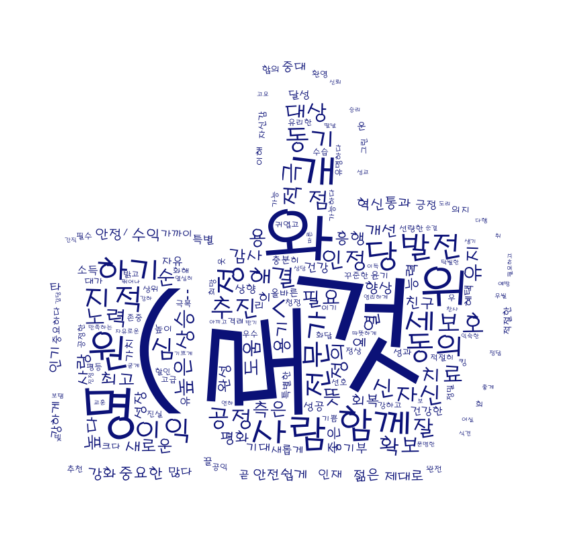

In [47]:
wordcloud = WordCloud(font_path="H2PORL.TTF",
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(pos_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()

### 감성사전에 긍정단어, 부정단어 추가하는 부분이라고 생각함

In [ ]:
SentiWord = pd.read_csv('SentiWord_info.csv') # csv를 불러옴
word = '알쏭'
SentiWord.loc[len(SentiWord)] = ['징용','징용',-2]  # 맨 끝에 징용 -2를 줌
SentiWord.loc[len(SentiWord)] = ['합의','합의',1] # 맨 끝에 합의 +1 을 줌
SentiWord.tail()

def pos_neg(word):
    tmp =SentiWord[(SentiWord['word']==word) | (SentiWord['word_root']==word)]
    try:
        word_res = (word,tmp['polarity'][tmp.index[0]])
    except:
        word_res = (word, 0)
    return word_res

pos_neg('알쏭')